In [1]:
import pandas as pd
import numpy as np

from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

### 1.Import data

In [2]:
airlines = pd.read_excel("D:\Downloads\Prajnya\Assignments\Clustering\EastWestAirlines.xlsx")
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### 2.EDA

In [3]:
airlines.shape

(3999, 12)

In [4]:
airlines.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
airlines.duplicated().sum()

0

In [6]:
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [10]:
airlines.drop(['ID#'],axis=1,inplace=True)
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
airlines.kurtosis()

Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [12]:
airlines.skew()

Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

<AxesSubplot:>

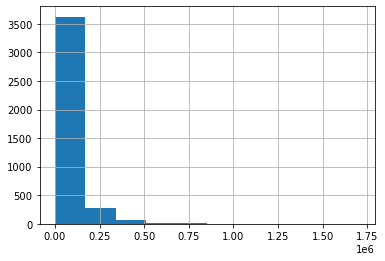

In [13]:
airlines['Balance'].hist()

<AxesSubplot:>

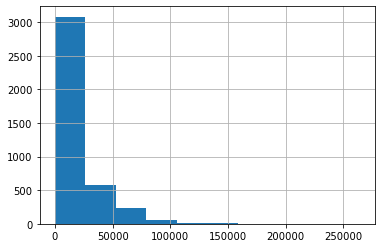

In [14]:
airlines['Bonus_miles'].hist()

<AxesSubplot:>

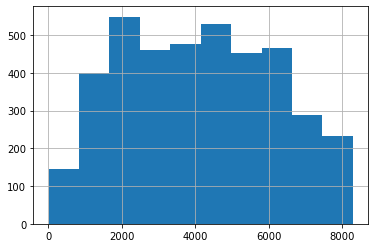

In [15]:
airlines['Days_since_enroll'].hist()

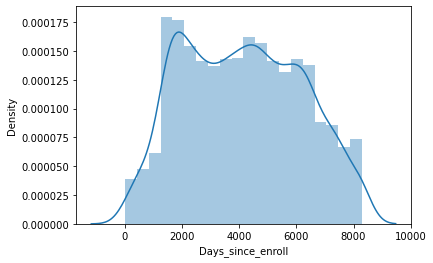

In [16]:
sns.distplot(airlines['Days_since_enroll'])
plt.show()

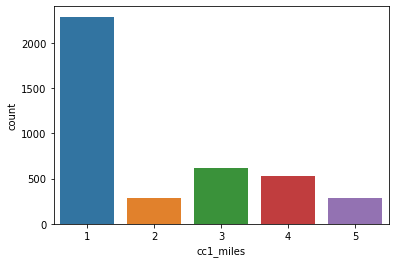

In [17]:
sns.countplot(x='cc1_miles',y=None,data = airlines)
plt.show()

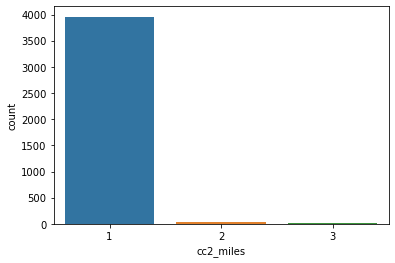

In [18]:
sns.countplot(x='cc2_miles',y=None,data = airlines)
plt.show()

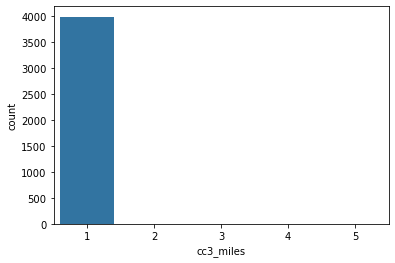

In [19]:
sns.countplot(x='cc3_miles',y=None,data = airlines)
plt.show()

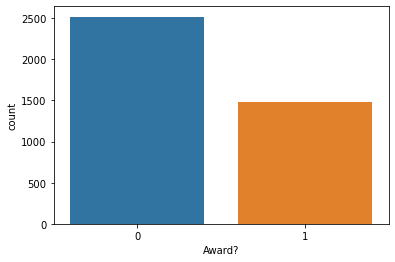

In [20]:
sns.countplot(x='Award?',y=None,data = airlines)
plt.show()

### 3. Model Training

In [21]:
array=airlines.iloc[:,1:].values
array

array([[   0,    1,    1, ...,    0, 7000,    0],
       [   0,    1,    1, ...,    0, 6968,    0],
       [   0,    1,    1, ...,    0, 7034,    0],
       ...,
       [   0,    3,    1, ...,    0, 1402,    1],
       [   0,    1,    1, ...,    1, 1401,    0],
       [   0,    1,    1, ...,    0, 1398,    0]], dtype=int64)

In [22]:
scaler = StandardScaler()
airlines_norm = scaler.fit_transform(array)
airlines_norm

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

### 4.Heirarchical clustering

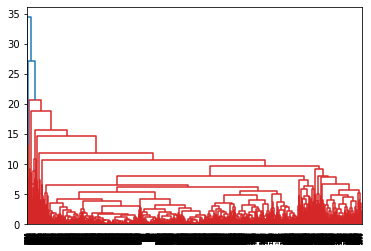

In [54]:
Dendrogram = sch.dendrogram(sch.linkage(airlines_norm, method = 'complete',optimal_ordering=False))

In [49]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [50]:
# save clusters for chart
y_hc = hc.fit_predict(airlines_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [27]:
Clusters.value_counts()

Clusters
0           3940
3             25
2             15
4             15
1              4
dtype: int64

In [28]:
airlines['h_clusterid'] = y_hc
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [29]:
airlines.groupby('h_clusterid').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,
0,73086.108376,98.715482,2.059645,1.007107,1.000761,16808.918528,11.453553,434.338071,1.303299,4115.906345,0.367259
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,119602.080000,7352.200000,1.760000,1.000000,1.000000,14299.560000,11.480000,1225.640000,3.560000,4572.240000,0.640000
4,52231.400000,66.666667,1.000000,3.000000,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000


### 5.DBSCAN

In [30]:
dbscan = DBSCAN(eps=1.2, min_samples=12)
dbscan.fit(airlines_norm)

DBSCAN(eps=1.2, min_samples=12)

In [31]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
airlines['DB_Cluster']=pd.DataFrame(dbscan.labels_)
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,DB_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [37]:
airlines['DB_Cluster'].value_counts()

 0    2381
 1    1208
-1     396
 2      14
Name: DB_Cluster, dtype: int64

In [40]:
#To find the percentage of noise points 
(len(airlines[airlines['DB_Cluster']==-1])/len(airlines))*100

9.902475618904726

In [42]:
X=metrics.silhouette_score(airlines_norm,dbscan.labels_)
X

0.26151601558170284

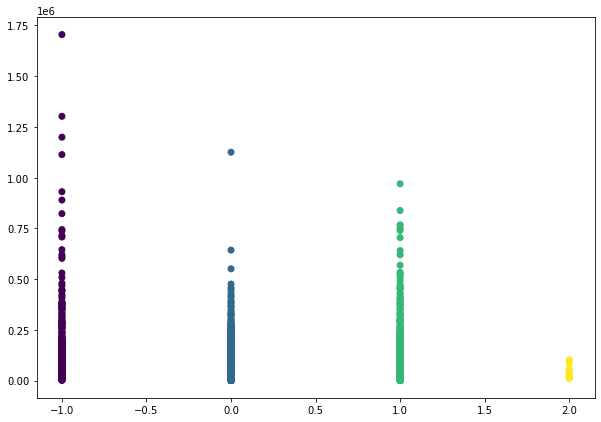

In [46]:
plt.figure(figsize=(10, 7))  
plt.scatter(airlines['DB_Cluster'],airlines['Balance'], c=dbscan.labels_)

### 6. K_means

[39990.00000000002, 31994.059340796626, 27514.811787685074, 23772.870563808858, 20301.459456585617, 18344.471180477376, 15550.24782545841, 13959.671669697085, 12704.20804121581, 11704.073227712526]


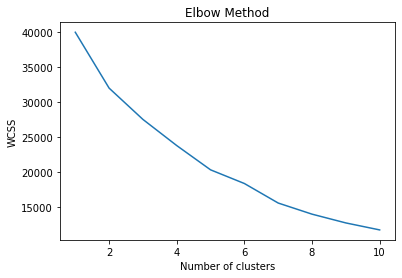

In [47]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7, random_state=0)
clusters_new.fit(airlines_norm)

KMeans(n_clusters=7, random_state=0)

In [52]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [53]:
#Assign clusters to the data set
airlines['clusterid_km'] = clusters_new.labels_
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,DB_Cluster,clusterid_km
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,2


In [55]:
#These are standardized values.
clusters_new.cluster_centers_

array([[ 3.73982165e-01,  1.34323551e-01, -9.82418871e-02,
        -6.27665798e-02,  6.56443711e-01,  1.76552583e+00,
         3.88100852e+00,  4.13380079e+00,  2.54085642e-01,
         8.13052984e-01],
       [-5.94306763e-02, -2.69483435e-01, -9.82418871e-02,
        -6.27665798e-02, -2.72162980e-01, -1.27815675e-01,
        -4.05050291e-02, -3.91869577e-02,  8.77346751e-02,
         1.30391816e+00],
       [-1.44892744e-01, -5.30486813e-01, -9.82418871e-02,
        -6.03050126e-02, -5.06561208e-01, -4.54663519e-01,
        -2.24743633e-01, -2.44969553e-01, -2.22011962e-01,
        -7.66919299e-01],
       [-8.44329231e-02,  1.02208440e+00, -9.82418871e-02,
         1.56462993e+01,  3.17969131e+00,  1.71461374e+00,
         3.32926913e-02,  5.96953922e-02,  2.39872612e-01,
         3.37527346e-01],
       [ 7.04065804e+00, -4.31702374e-03, -9.82418871e-02,
        -6.27665798e-02,  9.55601842e-02,  7.67900892e-02,
         3.48255260e-01,  3.91159384e-01, -1.08916294e-01,
         3.

In [56]:
airlines.groupby('clusterid_km').agg(['mean']).reset_index()
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,DB_Cluster,clusterid_km
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0,2


In [57]:
airlines['clusterid_km'].value_counts()

2    2081
6     860
1     809
0     135
4      56
5      43
3      15
Name: clusterid_km, dtype: int64